In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')
test=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')


In [7]:
test.shape

(3, 2)

In [8]:
train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [9]:
train['full_text'][0]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an

In [10]:
train.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


<Axes: >

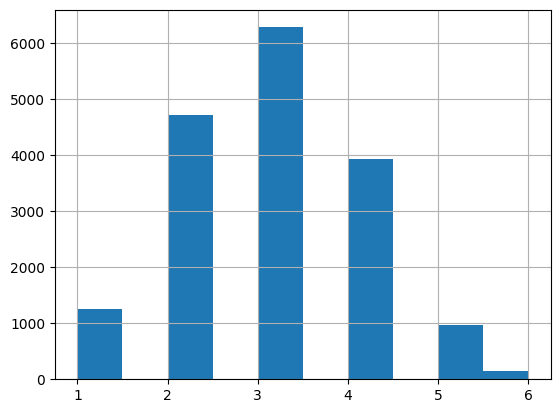

In [11]:
train.score.hist()

In [12]:
X=train['full_text']
y=train.score

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()
X_transformed=vect.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape

((13845, 64574), (3462, 64574))

# I want to fit a model but by nature this is a sparse matrix. lets select important features using  LGBM model

In [27]:
from catboost import CatBoostClassifier

In [28]:
lgb=CatBoostClassifier()
lgb.fit(X_train.astype(np.float32), y_train)

Learning rate set to 0.090475
0:	learn: 1.6970983	total: 969ms	remaining: 16m 7s
1:	learn: 1.6288339	total: 1.5s	remaining: 12m 29s
2:	learn: 1.5675381	total: 2.12s	remaining: 11m 44s
3:	learn: 1.5210935	total: 2.67s	remaining: 11m 4s
4:	learn: 1.4755350	total: 3.29s	remaining: 10m 54s
5:	learn: 1.4358157	total: 3.92s	remaining: 10m 49s
6:	learn: 1.4012819	total: 4.52s	remaining: 10m 41s
7:	learn: 1.3718697	total: 5.12s	remaining: 10m 35s
8:	learn: 1.3454180	total: 5.72s	remaining: 10m 30s
9:	learn: 1.3197987	total: 6.44s	remaining: 10m 37s
10:	learn: 1.2967233	total: 7.01s	remaining: 10m 30s
11:	learn: 1.2775839	total: 7.63s	remaining: 10m 28s
12:	learn: 1.2580811	total: 8.35s	remaining: 10m 33s
13:	learn: 1.2419307	total: 8.91s	remaining: 10m 27s
14:	learn: 1.2291752	total: 9.5s	remaining: 10m 23s
15:	learn: 1.2156622	total: 10.1s	remaining: 10m 22s
16:	learn: 1.2022160	total: 10.8s	remaining: 10m 21s
17:	learn: 1.1907347	total: 11.3s	remaining: 10m 16s
18:	learn: 1.1806904	total: 11

In [29]:
from sklearn.metrics import accuracy_score
preds=lgb.predict(X_test.astype(np.float32))
accuracy_score(y_test, preds)

0.5849220103986135

In [30]:
submission=test.copy()

In [31]:
submission.shape, test.shape

((3, 2), (3, 2))

In [32]:
textcount=vect.transform(submission['full_text'])

In [33]:
preds=lgb.predict(textcount.astype(np.float32))

In [34]:
preds.shape

(3, 1)

In [35]:
submission['full_text']=preds

In [36]:
submission

,essay_id,full_text
0,000d118,3
1,000fe60,3
2,001ab80,4


In [37]:
submission.to_csv('submission.csv', index=False)